In [1]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
# Define file paths
train_csv_path = '/home/ec2-user/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_train.csv'
test_csv_path = '/home/ec2-user/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_test.csv'

# Define image dimensions
img_height = 28
img_width = 28

# Output directory for generated images
output_dir = 'sign_language_image_dataset_tlf'
os.makedirs(output_dir, exist_ok=True)

# Function to create image directories and save images from CSV
def create_image_dataset_from_csv(csv_path, output_dir_name, is_train=True):
    try:
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print(f"Error: {csv_path} not found.")
        return None

    base_output_path = os.path.join(output_dir, output_dir_name)
    os.makedirs(base_output_path, exist_ok=True)

    if 'label' in df.columns:
        labels = df['label'].unique()
        label_dirs = {label: os.path.join(base_output_path, str(label)) for label in labels}
        for label_dir in label_dirs.values():
            os.makedirs(label_dir, exist_ok=True)
    else:
        print("Error: 'label' column not found in the CSV.")
        return None

    for index, row in df.iterrows():
        try:
            label = str(int(row['label']))
            pixels = row.drop('label').values.astype('float32')
            image_array = pixels.reshape((img_height, img_width))
            image = Image.fromarray(image_array).convert('L')

            image_filename = f'image_{index}.png'
            image_path = os.path.join(base_output_path, label, image_filename)
            image.save(image_path)

        except Exception as e:
            print(f"Error processing row {index}: {e}")

    print(f"Image generation from {csv_path} complete in {base_output_path}")
    return base_output_path

# Generate image dataset from the training CSV
train_image_dir = create_image_dataset_from_csv(train_csv_path, 'train_images', is_train=True)

# Generate image dataset from the testing CSV
test_image_dir = create_image_dataset_from_csv(test_csv_path, 'test_images', is_train=False)

if train_image_dir and test_image_dir:
    batch_size = 32
    image_size = (img_height, img_width)

    # Create TensorFlow Dataset for training data
    train_ds_full = tf.keras.utils.image_dataset_from_directory(
        train_image_dir,
        labels='inferred',
        label_mode='categorical',
        image_size=image_size,
        batch_size=batch_size,
        shuffle=True,
    )

    # Create TensorFlow Dataset for testing data
    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_image_dir,
        labels='inferred',
        label_mode='categorical',
        image_size=image_size,
        batch_size=batch_size,
        shuffle=False, # No need to shuffle the test set
    )

    # Split the full training dataset into training and validation sets
    dataset_size = tf.data.experimental.cardinality(train_ds_full).numpy()
    train_ratio = 0.8
    train_batches = int(train_ratio * dataset_size)

    train_ds = train_ds_full.take(train_batches)
    val_ds = train_ds_full.skip(train_batches)

    print("\nTensorFlow Datasets created:")
    print("Training Dataset:", train_ds)
    print("Validation Dataset:", val_ds)
    print("Testing Dataset:", test_ds)

    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
    test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

    # Example of iterating through a batch
    for images, labels in train_ds.take(1):
        print("\nShape of training images batch:", images.numpy().shape)
        print("Shape of training labels batch:", labels.numpy().shape)
        print("Example training labels:", labels.numpy())

    for images, labels in val_ds.take(1):
        print("\nShape of validation images batch:", images.numpy().shape)
        print("Shape of validation labels batch:", labels.numpy().shape)
        print("Example validation labels:", labels.numpy())

    for images, labels in test_ds.take(1):
        print("\nShape of testing images batch:", images.numpy().shape)
        print("Shape of testing labels batch:", labels.numpy().shape)
        print("Example testing labels:", labels.numpy())

else:
    print("Error in creating image datasets from CSV files.")

2025-05-08 19:24:30.116178: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 19:24:30.132312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-08 19:24:30.157025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-08 19:24:30.157051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-08 19:24:30.172495: I tensorflow/core/platform/cpu_feature_gua

Image generation from /home/ec2-user/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_train.csv complete in sign_language_image_dataset_tlf/train_images
Image generation from /home/ec2-user/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1/sign_mnist_test.csv complete in sign_language_image_dataset_tlf/test_images
Found 27455 files belonging to 24 classes.


2025-05-08 19:25:02.648918: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-08 19:25:02.694386: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-05-08 19:25:02.695588: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 7172 files belonging to 24 classes.

TensorFlow Datasets created:
Training Dataset: <_TakeDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24), dtype=tf.float32, name=None))>
Validation Dataset: <_SkipDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24), dtype=tf.float32, name=None))>
Testing Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24), dtype=tf.float32, name=None))>

Shape of training images batch: (32, 28, 28, 1)
Shape of training labels batch: (32, 24)
Example training labels: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.

2025-05-08 19:25:04.722907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Shape of validation images batch: (32, 28, 28, 1)
Shape of validation labels batch: (32, 24)
Example validation labels: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

2025-05-08 19:25:05.219530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-05-08 19:25:05.250195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
IMG_SIZE = 32  # Or any size >= 32 coz ResNet wantd it as basic criteria

def resize_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train_ds_resized = train_ds.map(resize_image)
test_ds_resized = test_ds.map(resize_image)

In [10]:
from tensorflow.keras.applications import ResNet50V2  # Or another ResNet variant like ResNet101V2, ResNet152V2
from tensorflow.keras import layers, models, optimizers
# from tensorflow.keras.callbacks import 

In [22]:
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,
    Conv2D, MaxPooling2D, Input, Flatten
)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)
from tensorflow.keras.regularizers import l2
tf.keras.backend.clear_session()
def build_sign_language_model(
    input_shape=(32, 32, 3),
    num_classes=24,  # Assuming American Sign Language (excluding J and Z which require motion)
    dropout_rate=0.5,
    l2_reg=0.001,
    learning_rate=0.0001
):
    base_model = ResNet50V2(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Create our custom top layers with regularization
    x = base_model.output
    
    # Global average pooling
    x = GlobalAveragePooling2D()(x)
    
    # Add batch normalization
    x = BatchNormalization()(x)
    
    # First dense layer with L2 regularization
    x = Dense(
        512, 
        activation='relu',
        kernel_regularizer=l2(l2_reg),
        bias_regularizer=l2(l2_reg)
    )(x)
    
    # Add dropout
    x = Dropout(dropout_rate)(x)
    
    # Add batch normalization
    x = BatchNormalization()(x)
    
    # Second dense layer with L2 regularization
    x = Dense(
        256, 
        activation='relu',
        kernel_regularizer=l2(l2_reg),
        bias_regularizer=l2(l2_reg)
    )(x)
    
    # Add dropout
    x = Dropout(dropout_rate)(x)
    
    # Output layer with softmax activation
    predictions = Dense(
        num_classes, 
        activation='softmax',
        kernel_regularizer=l2(l2_reg)
    )(x)
    
    # Create the final model
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [23]:
import datetime
def create_callbacks(checkpoint_path='sign_language_model.h5', use_tensorboard=False):
    """
    Create callbacks for training the model.
    
    Args:
        checkpoint_path: Path to save the best model weights
        use_tensorboard: Whether to use TensorBoard callback
        
    Returns:
        List of callbacks
    """
    callbacks = []
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    callbacks.append(early_stopping)
    
    # Reduce learning rate when the model plateaus
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    callbacks.append(reduce_lr)
    
    # Save the best model
    checkpoint = ModelCheckpoint(
        checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
    callbacks.append(checkpoint)
    
    # Add TensorBoard callback if requested
    # Note: TensorBoard can cause issues in some TF versions
    if use_tensorboard:
        try:
            from tensorflow.keras.callbacks import TensorBoard
            import datetime
            log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'-3'
            tensorboard_callback = TensorBoard(
                log_dir=log_dir,
                histogram_freq=1,
                write_graph=False,  # Set to False to avoid the error
                update_freq='epoch'
            )
            callbacks.append(tensorboard_callback)
        except Exception as e:
            print(f"Warning: TensorBoard callback could not be created: {e}")
    
    return callbacks

In [24]:
model = build_sign_language_model()

ValueError: The input must have 3 channels; Received `input_shape=(32, 32, 1)`

In [20]:
cbs = create_callbacks('tlf-mnist3.keras')
total = tf.data.experimental.cardinality(train_ds_resized).numpy()
val_size = int(0.2 * total)

val_ds_resized_split = train_ds_resized.take(val_size)
train_ds_resized_split = train_ds_resized.skip(val_size)


In [21]:
history = model.fit(train_ds_resized_split, epochs=30, callbacks=cbs, validation_data=val_ds_resized_split)

Epoch 1/30


ValueError: in user code:

    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 1398, in train_function  *
        return step_function(self, iterator)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 1370, in run_step  *
        outputs = model.train_step(data)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 1147, in train_step  *
        y_pred = self(x, training=True)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 558, in error_handler  *
        return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 588, in __call__  *
        return super().__call__(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/training.py", line 558, in error_handler  *
        return fn(*args, **kwargs)
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tf_keras/src/engine/base_layer.py", line 1103, in __call__  *
        input_spec.assert_input_compatibility(
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 495, in tf__assert_input_compatibility
        ag__.if_stmt(ag__.not_(ag__.ld(input_spec)), if_body_25, else_body_25, get_state_30, set_state_30, ('do_return', 'retval_', 'input_spec', 'inputs'), 2)
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 479, in else_body_25
        ag__.for_stmt(ag__.converted_call(ag__.ld(enumerate), (ag__.converted_call(ag__.ld(zip), (ag__.ld(inputs), ag__.ld(input_spec)), None, fscope),), None, fscope), extra_test, loop_body_4, get_state_29, set_state_29, ('do_return', 'retval_'), {'iterate_names': '(input_index, (x, spec))'})
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 463, in loop_body_4
        ag__.if_stmt(ag__.not_(continue__2), if_body_24, else_body_24, get_state_28, set_state_28, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 458, in if_body_24
        ag__.if_stmt(ag__.ld(shape).rank is None, if_body_23, else_body_23, get_state_27, set_state_27, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 359, in else_body_23
        ag__.if_stmt(ag__.ld(spec).axes, if_body_16, else_body_16, get_state_19, set_state_19, (), 0)
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 355, in if_body_16
        ag__.for_stmt(ag__.converted_call(ag__.ld(spec).axes.items, (), None, fscope), None, loop_body_2, get_state_18, set_state_18, (), {'iterate_names': '(axis, value)'})
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 354, in loop_body_2
        ag__.if_stmt(ag__.and_(lambda : ag__.ld(value) is not None, lambda : ag__.ld(shape_as_list)[ag__.converted_call(ag__.ld(int), (ag__.ld(axis),), None, fscope)] not in {ag__.ld(value), None}), if_body_15, else_body_15, get_state_17, set_state_17, (), 0)
    File "/tmp/__autograph_generated_file6gk2qkwy.py", line 350, in if_body_15
        raise ag__.converted_call(ag__.ld(ValueError), (f'Input {ag__.ld(input_index)} of layer "{ag__.ld(layer_name)}" is incompatible with the layer: expected axis {ag__.ld(axis)} of input shape to have value {ag__.ld(value)}, but received input with shape {ag__.converted_call(ag__.ld(display_shape), (ag__.ld(x).shape,), None, fscope)}',), None, fscope)

    ValueError: Exception encountered when calling layer 'model' (type Functional).
    
    Input 0 of layer "conv1_conv" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 38, 38, 1)
    
    Call arguments received by layer 'model' (type Functional):
      • inputs=tf.Tensor(shape=(None, 32, 32, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
model.evaluate(test_ds_resized)

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


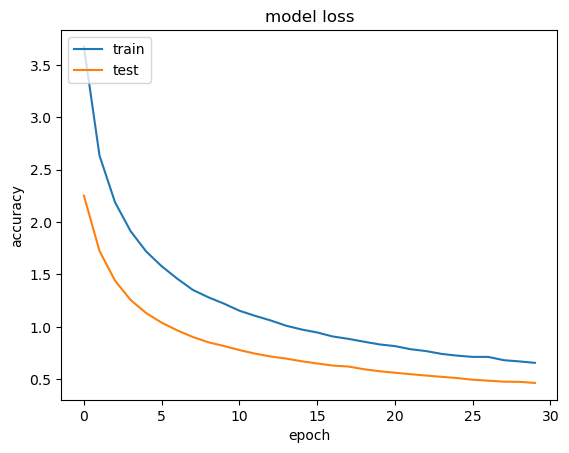

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
import matplotlib.pyplot as plt

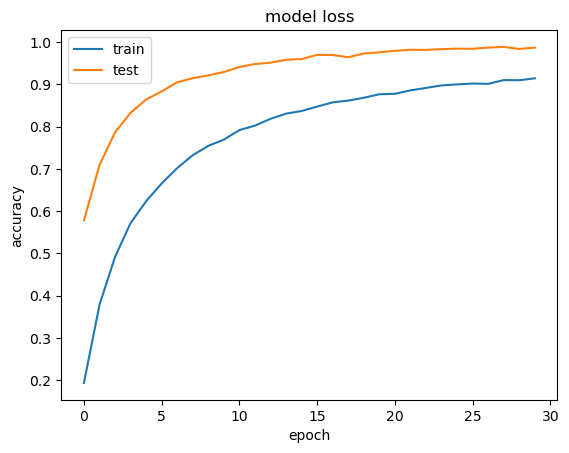

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
print(type(model))

<class 'tf_keras.src.engine.functional.Functional'>


In [65]:
model.save("tl_model.keras")

In [66]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 31.7 MB/s eta 0:00:00


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


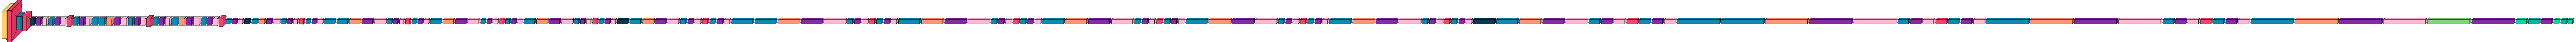

In [67]:
import visualkeras

visualkeras.(model).show() 

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 18, 18, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

In [70]:
!pip install draw_covnet

ERROR: Could not find a version that satisfies the requirement draw_covnet (from versions: none)
ERROR: No matching distribution found for draw_covnet


In [69]:
print("hello")

hello


In [72]:
import numpy as np

# Get true labels and predictions
y_true = []
y_pred_prob = []

for images, labels in test_ds_resized:
    y_true.extend(np.argmax(labels.numpy(), axis=-1))  # One-hot to class index
    preds = model.predict(images)
    y_pred_prob.extend(preds)

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)
y_pred_classes = np.argmax(y_pred_prob, axis=1)


1/1 [==============================] - 5s 5s/step


2025-05-08 14:38:19.571600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


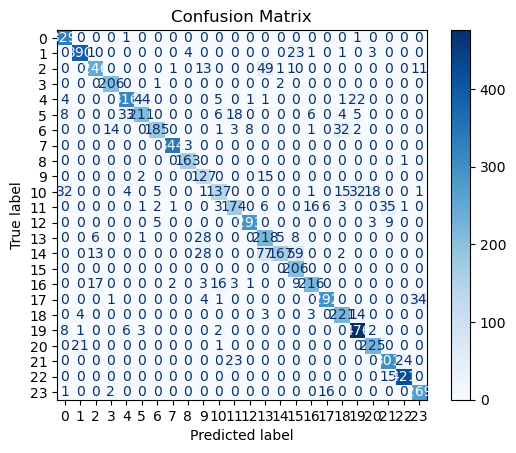

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")


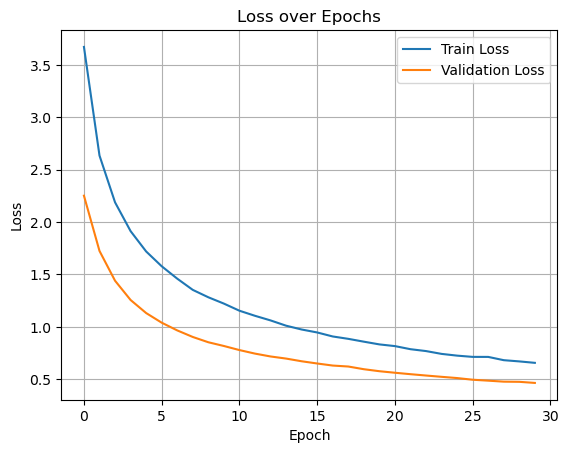

In [74]:
# If you used history = model.fit(...)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig("accuracy_curve.png")

plt.clf()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("loss_curve.png")

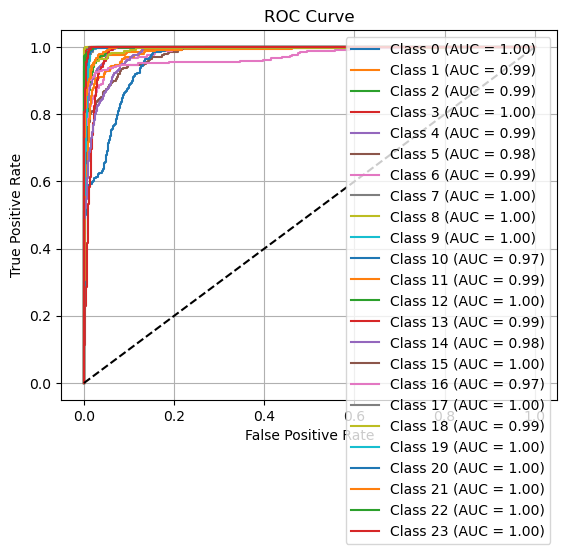

In [75]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binary or One-vs-Rest multiclass ROC
n_classes = y_pred_prob.shape[1]
y_test_bin = label_binarize(y_true, classes=list(range(n_classes)))

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.savefig("roc_curve.png")


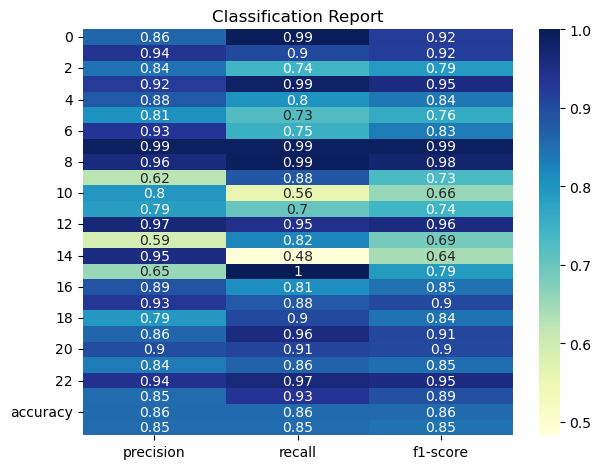

In [76]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

report = classification_report(y_true, y_pred_classes, output_dict=True)
df = pd.DataFrame(report).transpose()

sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.tight_layout()
plt.savefig("classification_report.png")

In [80]:
from sklearn.metrics import classification_report
class_names = list("ABCDEFGHIKLMNOPQRSTUVWXY")
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


              precision    recall  f1-score   support

           A       0.86      0.99      0.92       331
           B       0.94      0.90      0.92       432
           C       0.84      0.74      0.79       331
           D       0.92      0.99      0.95       209
           E       0.88      0.80      0.84       394
           F       0.81      0.73      0.76       291
           G       0.93      0.75      0.83       246
           H       0.99      0.99      0.99       347
           I       0.96      0.99      0.98       164
           K       0.62      0.88      0.73       144
           L       0.80      0.56      0.66       246
           M       0.79      0.70      0.74       248
           N       0.97      0.95      0.96       310
           O       0.59      0.82      0.69       266
           P       0.95      0.48      0.64       346
           Q       0.65      1.00      0.79       206
           R       0.89      0.81      0.85       267
           S       0.93    

In [81]:
len(class_names)

24